<a href="https://colab.research.google.com/github/celinka12/Data-Mining/blob/main/%5BQuestion%5D_Exercise_Week_8_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [132]:
# load dataset and show the first five sample
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [133]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [134]:
# describe data
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [135]:
# Check for null values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income,0
Spending Score,0


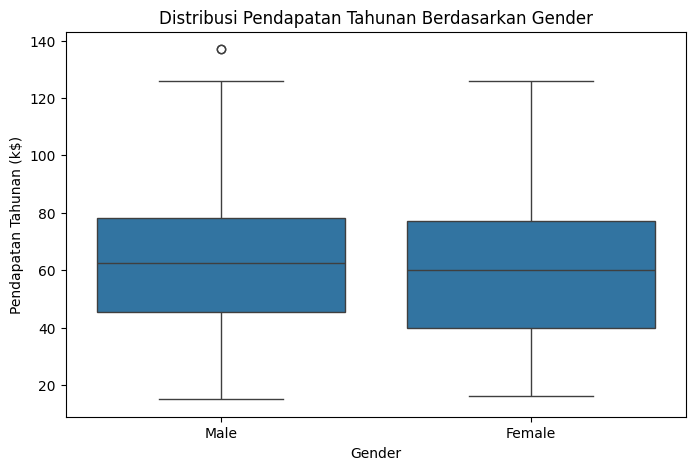

In [136]:
# make an insightful visualization and explain

# Box Plot untuk Pendapatan Tahunan berdasarkan Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Annual Income', data=df)
plt.title('Distribusi Pendapatan Tahunan Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Pendapatan Tahunan (k$)')
plt.show()

#dari visualisasi dapat dilihat jika pendapatan tahunan pelanggan laki-laki dan perempuan hampir sama,
#dengan rentang antara 20 ribu hingga 140 ribu dolar. Median pendapatan sekitar 60-70 ribu untuk keduanya.
#Ada satu outlier di kelompok laki-laki dengan pendapatan sekitar 140 ribu dolar.

In [137]:
# make an insightful visualization and explain


## Data Preprocessing

For this case study, we only use income and spending score

In [138]:
# create new dataframe that consist only annual income and spending score
df_new = df[['Annual Income', 'Spending Score']]
# Mengganti nama kolom
df_new.columns = ['Income', 'Spending']
# Menampilkan 5 baris pertama dari DataFrame baru
df_new.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [139]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_new_scaled = pd.DataFrame(scaler.fit_transform(df_new), columns = ['Income', 'Spending'])
df_new_scaled.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [140]:
# get stastical information on the new dataset
df_new_scaled.describe()

,Income,Spending
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

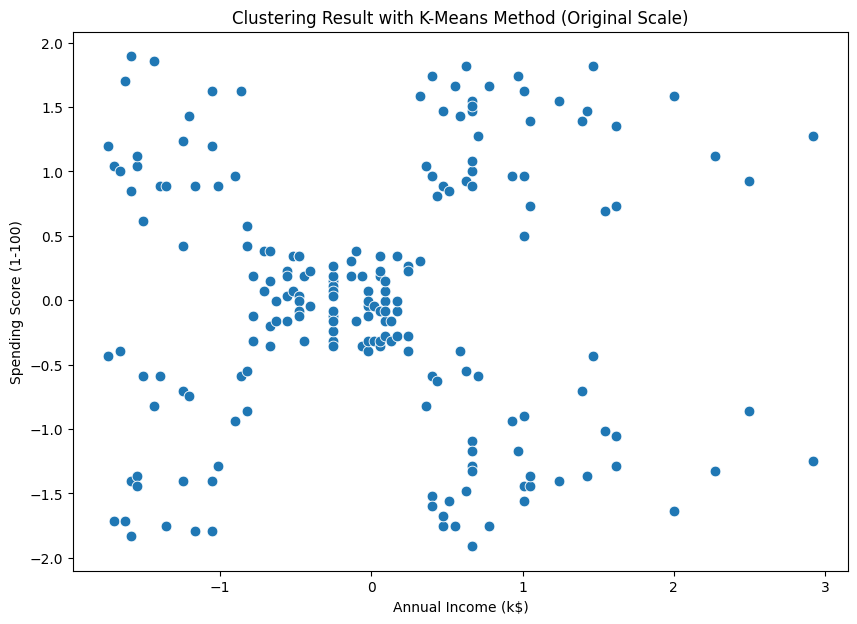

In [155]:
# Visualize the position
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Visualize the clustering result
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], s=60)  # Removed hue and palette
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clustering Result with K-Means Method (Original Scale)")
plt.show()


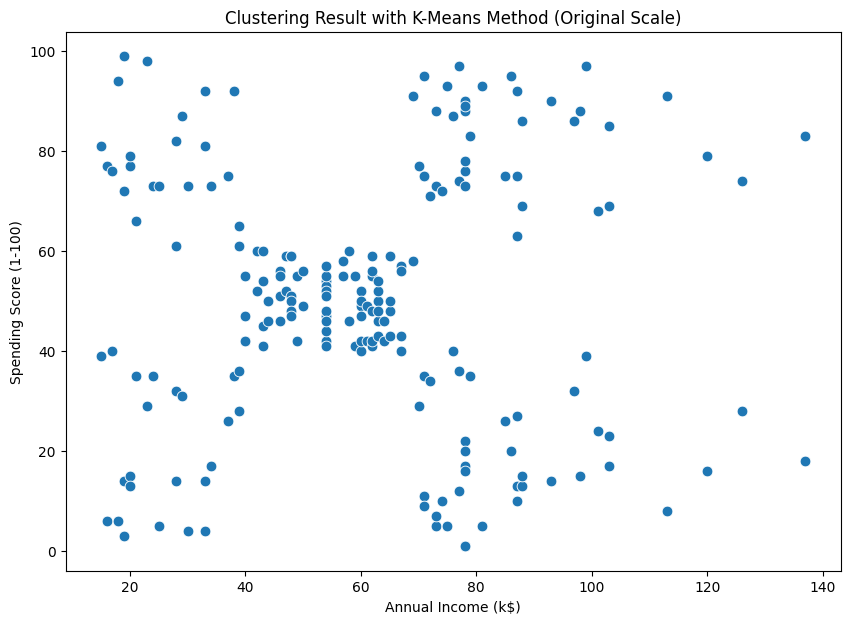

In [143]:
# Visualize the position using the original scale
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Visualize the clustering result without colors and on original scale
plt.figure(figsize=(10, 7))
sns.scatterplot(x="Annual Income", y="Spending Score", data=df, s=60)  # Using original data and no hue
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clustering Result with K-Means Method (Original Scale)")
plt.show()


## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [146]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_new_scaled)
    sse.append(kmeans.inertia_)

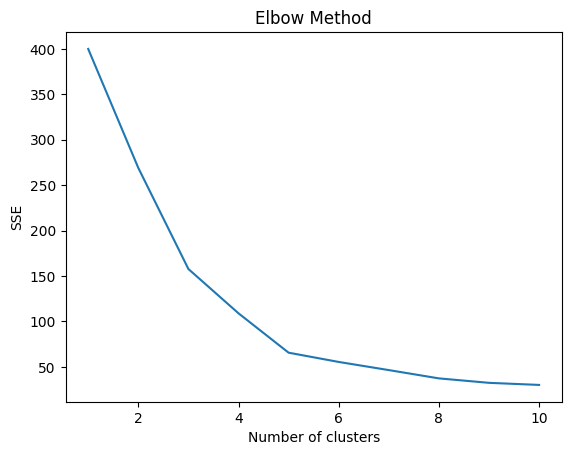

In [147]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [148]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print("The best k for you model is" ,kneedle.elbow)

The best k for you model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [149]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_new_scaled)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

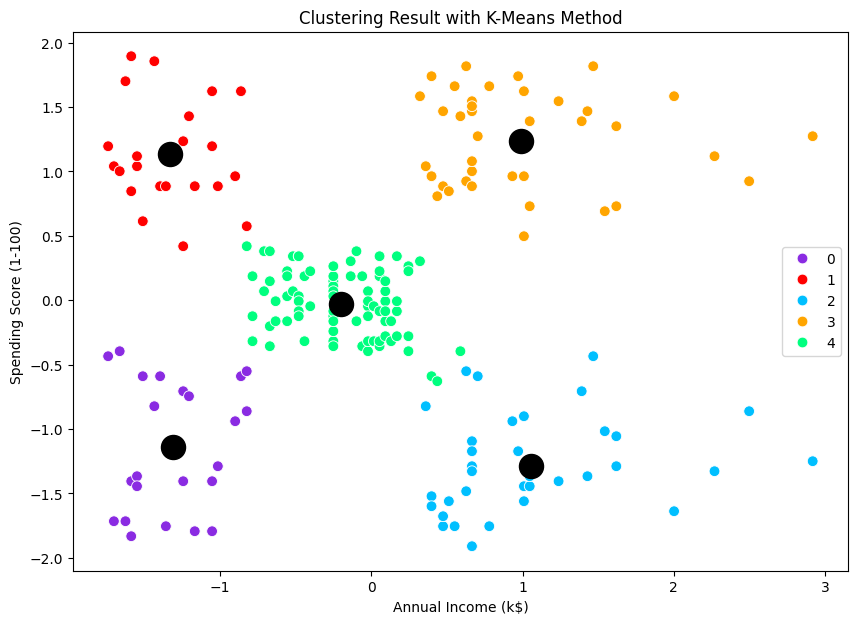

In [150]:
# visualize the result using scater chart
# visualize the result using scater chart
# Visualize the clustering result
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
# Pass your DataFrame (df_new_scaled) to the 'data' parameter:
sns.scatterplot(x="Income", y="Spending", hue=y_pred, palette= ["blueviolet","red","deepskyblue","orange","springgreen"], s=60, data=df_new_scaled)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [152]:
# Inverse transform the scaled data to get the original values
df_new_scaled_inverse = pd.DataFrame(scaler.inverse_transform(df_new_scaled), columns=['Income', 'Spending'])

# Add the cluster labels to the original DataFrame
df_new_scaled_inverse['Cluster'] = y_pred
df_new_scaled_inverse.head()  # Display the first few rows of the DataFrame with cluster labels

,Income,Spending,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [157]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df_new_scaled_inverse.groupby(y_pred).agg({'Income': ['mean', 'std', 'min', 'max'],
                                          'Spending': ['mean', 'std', 'min', 'max']})
cluster_summary = cluster_summary.rename_axis('cluster')
cluster_summary

Income                           Spending                       
              mean        std   min    max       mean        std   min   max
cluster                                                                     
0        26.304348   7.893811  15.0   39.0  20.913043  13.017167   3.0  40.0
1        25.727273   7.566731  15.0   39.0  79.363636  10.504174  61.0  99.0
2        88.200000  16.399067  70.0  137.0  17.114286   9.952154   1.0  39.0
3        86.538462  16.312485  69.0  137.0  82.128205   9.364489  63.0  97.0
4        55.296296   8.988109  39.0   76.0  49.518519   6.530909  34.0  61.0

**Hasil Interpretasi Cluster**

**Cluster 0:**
- **Karakteristik:** Individu dalam kelompok ini memiliki pendapatan tahunan yang relatif rendah (rata-rata sekitar 26) dan skor pengeluaran yang rendah (rata-rata sekitar 21).
- **Interpretasi:** Kelompok ini cenderung berhemat atau memiliki daya beli yang terbatas, kemungkinan karena keterbatasan finansial.
- **Saran:** Targetkan kelompok ini dengan produk yang lebih terjangkau, diskon, atau program loyalitas untuk mendorong pembelian ulang.

**Cluster 1:**
- **Karakteristik:** Pendapatan rendah (rata-rata sekitar 25) tetapi skor pengeluaran tinggi (rata-rata sekitar 79).
- **Interpretasi:** Individu dalam kelompok ini cenderung mengalokasikan sebagian besar pendapatannya untuk pengeluaran. Mereka mungkin menyukai produk atau pengalaman premium, meskipun dengan anggaran terbatas.
- **Saran:** Tawarkan penawaran eksklusif atau paket premium dengan ukuran kecil yang sesuai dengan preferensi mereka terhadap produk bernilai tinggi, meskipun dengan pendapatan yang lebih rendah.

**Cluster 2:**
- **Karakteristik:** Pendapatan tinggi (rata-rata sekitar 88) tetapi skor pengeluaran rendah (rata-rata sekitar 17).
- **Interpretasi:** Kelompok ini memiliki pendapatan yang tinggi namun cenderung selektif atau hati-hati dalam pengeluaran.
- **Saran:** Berikan penawaran personal dengan fokus pada kualitas dan eksklusivitas yang mungkin menarik bagi mereka.

**Cluster 3:**
- **Karakteristik:** Pendapatan dan pengeluaran tinggi (rata-rata sekitar 87 untuk pendapatan dan 82 untuk pengeluaran).
- **Interpretasi:** Pelanggan ini memiliki daya beli tinggi dan kemungkinan merupakan segmen premium yang mencari produk mewah atau eksklusif.
- **Saran:** Tawarkan produk premium, layanan eksklusif, serta program loyalitas untuk mempertahankan pelanggan bernilai tinggi ini. Layanan personal atau pengalaman VIP akan sangat efektif.

**Cluster 4:**
- **Karakteristik:** Pendapatan dan pengeluaran sedang (rata-rata sekitar 55 untuk pendapatan dan 50 untuk pengeluaran).
- **Interpretasi:** Pelanggan ini memiliki pendapatan menengah dan kebiasaan belanja yang seimbang.
- **Saran:** Kelompok ini akan merespon baik terhadap penawaran yang berfokus pada nilai, paket bundel, atau promosi yang menonjolkan kualitas dengan harga terjangkau.

**Rekomendasi untuk Perusahaan**

1. **Pemasaran Tersegmentasi:** Kembangkan strategi pemasaran yang disesuaikan dengan kebutuhan setiap cluster untuk meningkatkan keterlibatan dan memaksimalkan pengeluaran.
2. **Program Loyalitas:** Buat program loyalitas bertingkat yang menawarkan hadiah berdasarkan pola pengeluaran. Misalnya, tawarkan penawaran eksklusif untuk pelanggan dengan pengeluaran tinggi (Cluster 3) dan diskon kecil namun sering untuk kelompok yang hemat.
3. **Diversifikasi Produk:** Sediakan kombinasi produk premium dan terjangkau untuk melayani pelanggan berpenghasilan tinggi (Cluster 3) serta kelompok yang berhemat (Cluster 0).
4. **Personalisasi:** Gunakan pendekatan personal, terutama untuk pelanggan berpenghasilan tinggi yang selektif (Cluster 2), dengan merekomendasikan produk yang sesuai dengan preferensi mereka.
5. **Promosi dan Paket Bundel:** Dorong pelanggan berpenghasilan menengah (Cluster 4) untuk berbelanja lebih banyak dengan menawarkan paket bundel yang menambah nilai tanpa menaikkan harga secara signifikan.


<write here>